<a href="https://colab.research.google.com/github/Colsai/Coursera-Data-Science-Practice/blob/master/hw12/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 8: DATA690 WANG
## STATS AND VISUALIZATION (HIRABAYASHI)


*Use this first to Mount Google Drive*

In [611]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Assignment 8
For this assignment , we will use the college scorecard dataset. 
<pre>
From the 22 individual school year data files, randomly (using Python) select one file. 
Only read the column "TUITIONFEE_IN" frm this file into a data frame.
Find out how many observations this data frame has.
Find out how many observations that have missing value. Drop those observations.
Find out how many observations that have value of zero. Drop those observations.
Calculate the mean of the tuition.
Randomly select one observation, find out the tuition of that observation.
Calculate the different between the tuition of this observation and the average tuition (mean) off all observations above.
Randomly select another observation and repeat the above.
Randomly select another observation and repeat the above.
Randomly select 5 observations, display the tuition of these observation.
Calculate the average of these 5 observations
Calculate the different between the average tuition of thes 5 observations and the average tuition (mean) off all observations above.
Randomly select another 5 observations and repeat the above.
Randomly select another 5 observation and repeat the above.

Randomly select 10 observations, display the tuition of these observation.
Calculate the average of these 10 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 10 observations and repeat the above.
Randomly select another 10 observation and repeat the above.


Randomly select 20 observations, display the tuition of these observation.
Calculate the average of these 20 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 20 observations and repeat the above.
Randomly select another 20 observation and repeat the above.

Randomly select 30 observations, display the tuition of these observation.
Calculate the average of these 30 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 30 observations and repeat the above.
Randomly select another 30 observation and repeat the above.

Write a function that take an input x (number of observations). 
The function will perform the following:

Randomly select x observations, display the tuition of these observations.
Calculate the average of these x observations
Calculate the different between the average tuition of these x observations and the average tuition (mean) off all observations above.
Display the difference.
<pre>


## 1 - Import necessary libraries

In [612]:
#Import pandas, random, matplotlib, etc.
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

## 2 - Retrieve the names of the 22 files and assign them to a List variable

In [613]:
# You would need to filter out other files
# Display the names of these 22 files
data_dir = '/content/drive/My Drive/College Data/'

files = os.listdir(data_dir)
merged_files = []

for i in files:
    if "MERGED" in i:
        merged_files.append(i)

In [614]:
#let's just check the length of the number of merged_files (is it around 22/23)
len(merged_files)

23

## 3 - Write code to randomly select one file name out of the 22 files names. 

In [615]:
# Hint: generate a random integer between 0 and 21 first
# Display the file name

rand_num = random.randint(0, len(merged_files)-1)
file_name = merged_files[rand_num]
print(file_name)

MERGED2014_15_PP.csv


## 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")

In [616]:
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv(data_dir + file_name, 
                          usecols = ["INSTNM", "TUITIONFEE_IN"])

In [617]:
#Look at the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7766 non-null   object 
 1   TUITIONFEE_IN  4407 non-null   float64
dtypes: float64(1), object(1)
memory usage: 121.5+ KB


## 5 - Find out how many observations have missing value.

In [618]:
#Look for null values
df.isnull().count() #Or we can use .sum()

INSTNM           7766
TUITIONFEE_IN    7766
dtype: int64

In [619]:
#Head of the data
df.head()

,INSTNM,TUITIONFEE_IN
0,Alabama A & M University,9096.0
1,University of Alabama at Birmingham,7510.0
2,Amridge University,6900.0
3,University of Alabama in Huntsville,9158.0
4,Alabama State University,8720.0


In [620]:
#Shape of the dataframe
df.shape

(7766, 2)

## 6 - Drop those observations with missing value

In [621]:
#Look for all of the data that is NaN
clean_df = df.dropna(axis = 0, how ='any') 

In [622]:
# Display the number of observations afterward
len(clean_df)

4407

In [623]:
#How many observations did we drop?
len(df) - len(clean_df)

3359

## 7 - Find out how many observations have 0 tuition: Let's just take a look by sorting

In [624]:
#Sort the data to look at some values that are 0
clean_df.sort_values(by="TUITIONFEE_IN", ascending=True)

,INSTNM,TUITIONFEE_IN
7431,Lincoln College of New England-Hartford,0.0
1365,Haskell Indian Nations University,580.0
107,Dine College,725.0
4436,Luna Community College,886.0
689,United States Coast Guard Academy,942.0
...,...,...
2662,Vassar College,49570.0
4349,Landmark College,50080.0
2597,Sarah Lawrence College,50780.0
2427,Columbia University in the City of New York,51008.0


In [625]:
#How many observations have 0 tuition?
len(clean_df[clean_df['TUITIONFEE_IN'] == 0.0])

1

### Now we will drop them from the dataset.

In [626]:
#Looks like there are only two values that satisfy that condition
drop_these = clean_df[clean_df['TUITIONFEE_IN'] == 0.0]

In [627]:
#How many observations are we dropping?
len(drop_these)

1

## 8 - Drop those observations with 0 tuition

In [628]:
#Drop the data ('adds' the data together and then removes the duplicates)
clean_df2 = pd.concat([clean_df, drop_these]).drop_duplicates(keep=False).sort_values(by="TUITIONFEE_IN")

In [629]:
# Display the number of observations afterward
clean_df2.shape

(4364, 2)

## 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 

In [630]:
#Aggregate and take mean
clean_df2['TUITIONFEE_IN'].agg("mean")

14156.788725939505

## 10 - Randomly select just 1 observation from the data frame.

In [631]:
# Display the tuition of that observation. 
one_obs = clean_df2.sample(1)
obs_tuition = int(one_obs['TUITIONFEE_IN'])
print(obs_tuition)

17997


## 11 - Calculate the different between the tuition of this observation and the mean tuition off all observations calculated earlier.

In [632]:
# Display the difference
int(clean_df2.agg("mean")) - obs_tuition

-3841

In [633]:
#Let's store the full_df mean so that we can use it again in the later cells
full_df_mean = int(clean_df2.agg("mean"))

## 12 - Repeat 10 to 11 several times get the feel of the size of the difference in *means*

In [634]:
mean_difs = []

for i in range(10):
    dif = int(clean_df2['TUITIONFEE_IN'].sample(1)) - full_df_mean
    mean_difs.append(dif)

#Sort high to low
sorted(mean_difs, reverse=False)

[-12935, -11861, -11756, -10784, -8640, -7796, -6726, -2156, 3892, 12220]

## 13 - Randomly select 20 observations, display the tuition of these observation. 

In [635]:
sample_tuitions = []

for i in range(20):
    sample_tuitions.append(int(clean_df2['TUITIONFEE_IN'].sample(1)))

sorted(sample_tuitions)

[3359,
 3766,
 4232,
 5785,
 7265,
 7294,
 8756,
 9965,
 12975,
 13932,
 14245,
 15296,
 16044,
 21100,
 24650,
 28900,
 29842,
 32960,
 41380,
 44724]

OR

In [636]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
samples_df = clean_df2['TUITIONFEE_IN'].sample(20)

## 14 - Calculate and display the mean tuition of these 20 observations

In [637]:
samples_df.mean()

12492.2

## 15 - Calculate  the different between the average tuition of these 20 observations 

In [638]:
# and the mean tuition off all observations calculated earlier.
# Display the difference
round(full_df_mean - statistics.mean(sample_tuitions),2)

-3167.5

## 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 

In [639]:
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion
multi_obs = []
for i in range(20):
    one_sample = clean_df2['TUITIONFEE_IN'].sample(20)
    obs_diff = full_df_mean = one_sample.mean()
    multi_obs.append(obs_diff)

print(sorted(multi_obs))

[8149.0, 10914.85, 10974.6, 12034.6, 12137.85, 12289.75, 12913.35, 13350.5, 13355.5, 13778.5, 13810.85, 14130.95, 14301.8, 14639.45, 14785.75, 14957.65, 15559.6, 15635.3, 16249.25, 17985.45]


### Hypothesis: 
These values will likely converge on an normal/gaussian distibution, which is evidenced by the number of values that are between 8-9k here.  
Looking at the data, my understanding would be that the more samples we see, the closer we get to most values being near the mean of the entire set of values (values will be more likely to converge in terms of probability near the mean)

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

## 17 - write function Code here

In [640]:
# Function:
def sample_obs(sample_obs,df):
    return int(df.agg("mean") - df.sample(sample_obs).agg("mean")) #Returns Difference

## 18 - test the function by passing a sample size and the name of the dataframe

In [641]:
# Display the return of the function
sample_obs(5, samples_df)

-2134

## 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";

In [642]:
# display it to make sure its members are from 1 to 50
sample_sizes = [i for i in range(1,51)]

In [643]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed
means_diff = []

for i in sample_sizes:
    means_diff.append(sample_obs(i, clean_df2))

print(means_diff)

[-23873, -12388, -5660, -4769, -2260, 1563, -1971, 540, 1029, 2182, 3025, 3139, -4824, 1071, -534, 894, 2257, 3799, 1517, 2415, 1984, 1014, 2671, 2131, -541, 3183, 2902, 3230, 178, 2003, 1014, 1136, -317, 1029, 1290, -1178, 15, 2231, 677, 1172, -936, -321, 1060, 981, 283, -1850, -1422, -2183, 40, 375]


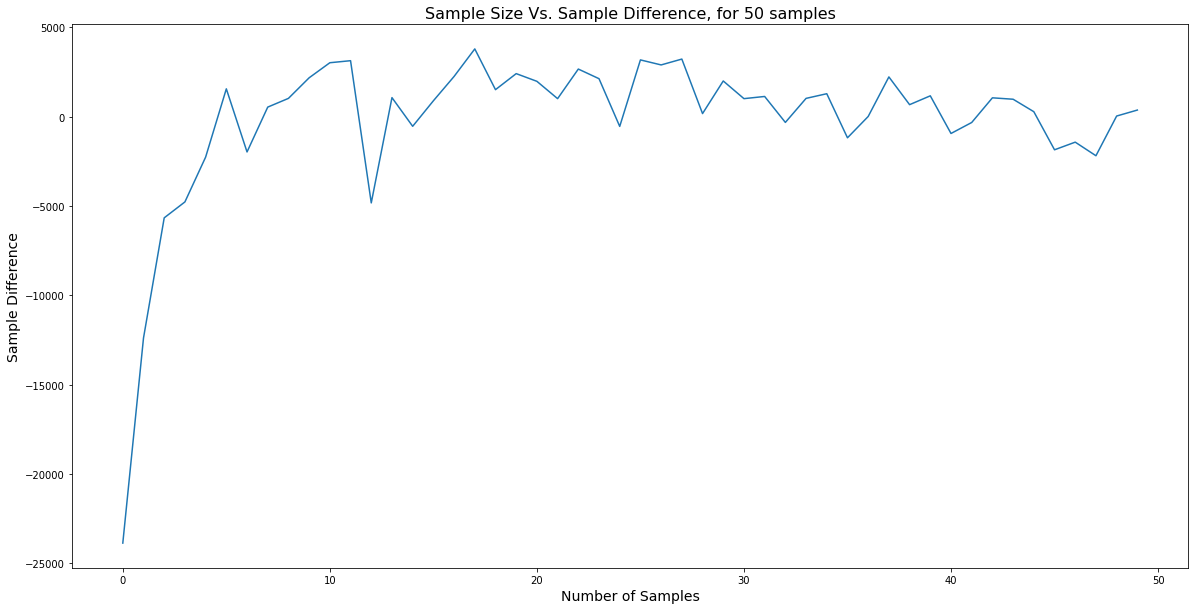

In [644]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
plt.figure(figsize=(20,10))
plt.xlabel("Number of Samples", size = 14)
plt.ylabel("Sample Difference", size = 14)
plt.title(f"Sample Size Vs. Sample Difference, for {len(means_diff)} samples", size= 16)
plt.plot(means_diff)

In [645]:
# Sample for a thousand
sample_300 = [i for i in range(1,501)]

## 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.

In [646]:
# and see how the plot looks.
means_diff_2 = []

for i in sample_300:
    means_diff_2.append(sample_obs(i, clean_df2))

print(means_diff_2)

[-3891, 5839, -3526, -7133, 1341, 6744, 6170, -6341, -2027, -2177, 3093, -1527, -483, 1810, 2871, 781, -1882, -3477, -828, -4236, -1398, 982, 397, -811, -1722, -946, -3154, 3235, -1874, 577, 2815, 2339, 1711, 493, 1055, -795, -2220, -1086, -3273, -1622, 119, -1317, 346, -924, -2179, 3037, 1132, 1614, -681, -1299, 134, -939, 487, -154, -1937, 528, -538, -450, 1211, -1339, 755, -475, -703, -1538, -819, -1093, 987, 2465, 237, -1342, 954, -796, -829, -1251, -1642, -1055, 1447, 1056, -596, 675, 1963, 997, -809, -2772, -2327, 835, -445, -1780, -2879, -204, 198, -2057, 41, 349, -741, -598, 1437, 607, 132, 1024, -1437, 712, 118, 259, -658, -431, -616, -606, -1562, 1242, -826, -1155, -1030, -757, 1198, -215, -57, 359, -520, -1492, -2108, -165, 160, 425, 222, -540, -759, -591, -1617, 117, -945, 1462, -182, -586, 411, -1447, -2352, 1096, 1341, -639, 360, -509, -183, -502, 1032, 628, 1852, 508, -2047, -183, -500, -151, -440, 1385, -875, -1339, -453, 915, -1662, -216, 465, 720, 214, 170, -630, 97, 

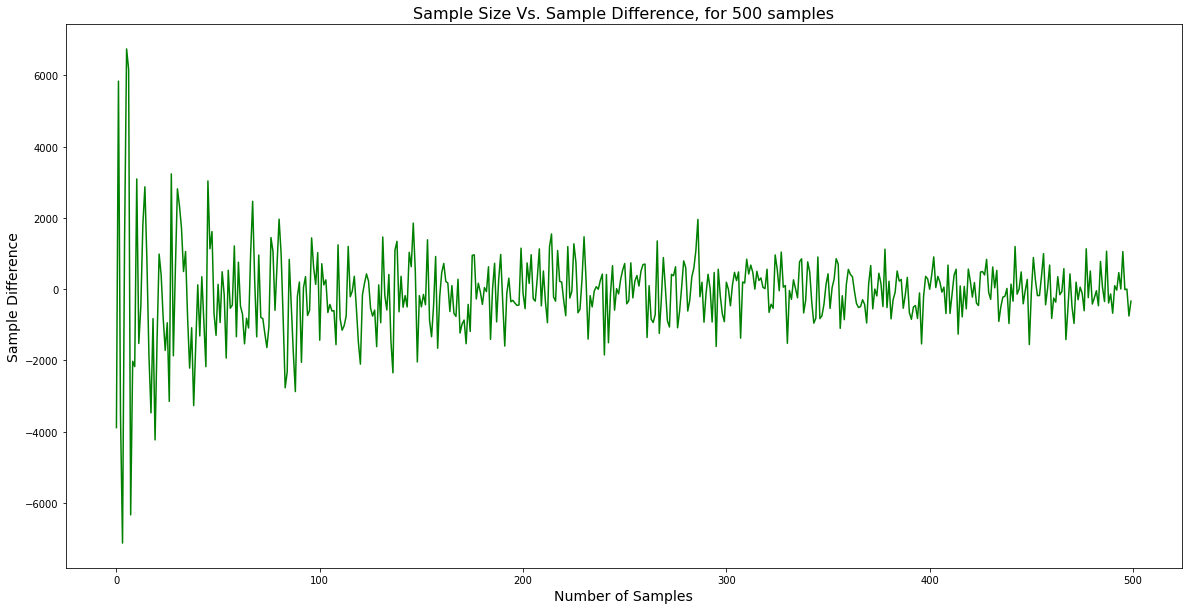

In [647]:
#Plot the graph
plt.figure(figsize=(20,10))
plt.title(f"Sample Size Vs. Sample Difference, for {len(means_diff_2)} samples", size= 16)
plt.xlabel("Number of Samples", size = 14)
plt.ylabel("Sample Difference", size = 14)
plt.plot(means_diff_2, color = "green")

In [648]:
# The end - Give yourself a pat on the back!